In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [99]:
# load dataset and display the first 5 rows
df = pd.read_csv('cardekho.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [ ]:
# Check for missing values in the dataset.
# Explain why we can’t train a model with missing target values.
df.isna().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [101]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [102]:
df.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object

In [103]:
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

In [104]:
df['engine'] = df['engine'].fillna(df['engine'].mean())
df['max_power'] = df['max_power'].fillna(df['max_power'].mean())
df['mileage(km/ltr/kg)'] = df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].mean())
df['seats'] = df['seats'].fillna(df['seats'].mean())
 
df.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

In [105]:
df.isna().sum()
df.dropna(subset=['selling_price'], inplace=True)

In [106]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8123    False
8124    False
8125    False
8126     True
8127     True
Length: 8128, dtype: bool

In [93]:
#5. # Remove duplicate rows from the dataset.
df.drop_duplicates()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [109]:
#6. # Convert the “year” column into the car’s age.
#Get current year
current_year = datetime.now().year
 
#Create "car_age" column
df['car_age'] = current_year - df['year']
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18


In [ ]:
#7. Check the unique values in the “fuel type” column.
#Explain why knowing all possible values in a categorical column is important before encoding.
df["fuel"].nunique()

4

In [111]:
#Replace inconsistent terms with standardized ones
df['transmission'] = df['transmission'].replace({
    'manual': 'Manual',
    'automatic': 'Automatic'
})
print(df['transmission'].str.strip().str.lower().unique())

['manual' 'automatic']


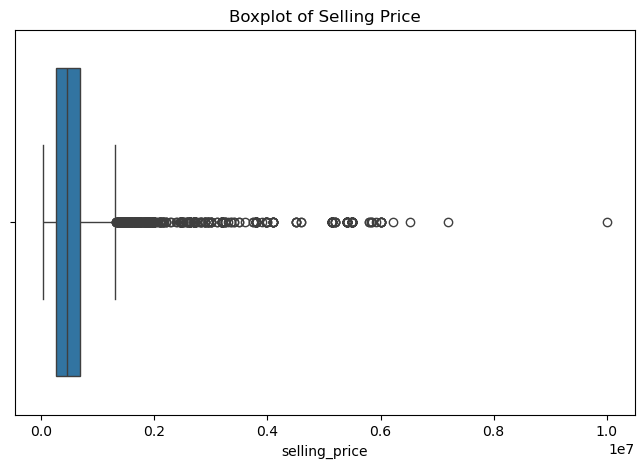

In [ ]:
#9. Check if there are any outliers in the “selling price” column using a boxplot. Explain why outliers can affect model accuracy.
 #Create a boxplot for the price column
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["selling_price"])
plt.title("Boxplot of Selling Price")
plt.xlabel("selling_price")
plt.show()

In [ ]:
#10. Remove cars priced below 10,000 or above 5,000,000 Explain why setting realistic price limits can help improve model performance
#Remove cars priced below 10,000 or above 5,000,000
df_cleaned = df[(df["selling_price"] >= 10000) & (df["selling_price"] <= 5000000)]

In [114]:
#Check the shape before and after cleaning
print("Original dataset size:", df.shape)
print("Cleaned dataset size:", df_cleaned.shape)
 
#Verify no values are outside the desired range
print(df_cleaned["selling_price"].describe())

Original dataset size: (8128, 13)
Cleaned dataset size: (8011, 13)
count    8.011000e+03
mean     5.676563e+05
std      5.559933e+05
min      2.999900e+04
25%      2.500000e+05
50%      4.500000e+05
75%      6.510000e+05
max      4.600000e+06
Name: selling_price, dtype: float64


In [115]:
#11. Standardize the column names
#so they are all lowercase and contain underscores instead of spaces.
 
#Standardize column names: lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(" ", "_")
#to change mileage title
df= df.rename(columns={'mileage(km/ltr/kg)':'mileage'})
 
#Check the updated column names
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18


In [116]:
#13. Create a new column for “price per kilometer” by dividing the selling price by the mileage.
#to create a new column
df["priceperkilometer"]= df['selling_price']/df['mileage']
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,priceperkilometer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11,19230.769231
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11,17502.365184
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19,8926.553672
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15,9782.608696
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18,8074.534161


In [117]:
#14. Ensure the dataset index is properly reset after cleaning.Reset the index and drop the old one
df = df.reset_index(drop=True)
 

print(df.index)

RangeIndex(start=0, stop=8128, step=1)


In [118]:
df.to_csv("cleaned_cardekho.csv",index = False)

In [119]:
## 16. Find the average selling price of cars in the dataset.
avg_selling_price = df['selling_price'].mean()
print(avg_selling_price)

638271.8077017716


In [120]:
## Find the most common fuel type in the dataset.
most_common_fuel = df['fuel'].value_counts().idxmax()
print(most_common_fuel)

Diesel


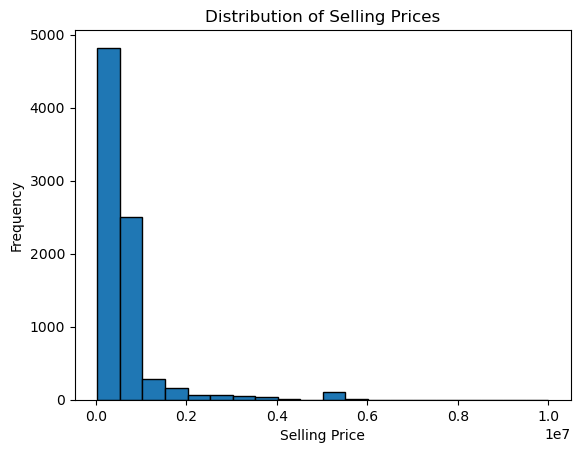

In [121]:
## Plot a histogram of the selling prices
plt.hist(df['selling_price'], bins=20, edgecolor='black')
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Selling Prices")
plt.show()

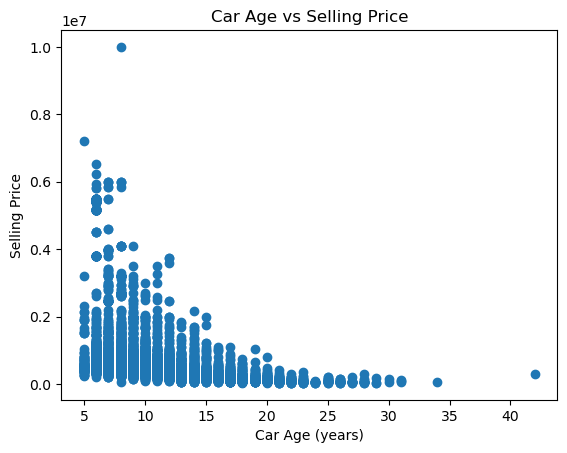

In [122]:
## Plot the relationship between car age and selling price using a scatter plot.
plt.scatter(df['car_age'], df['selling_price'])
plt.xlabel("Car Age (years)")
plt.ylabel("Selling Price")
plt.title("Car Age vs Selling Price")
plt.show()

In [123]:
## Group cars by fuel type and find the average selling price for each group.
avg_price_by_fuel = df.groupby('fuel')['selling_price'].mean()

print(avg_price_by_fuel)

fuel
CNG       301017.491228
Diesel    791452.921627
LPG       200421.052632
Petrol    462441.061691
Name: selling_price, dtype: float64


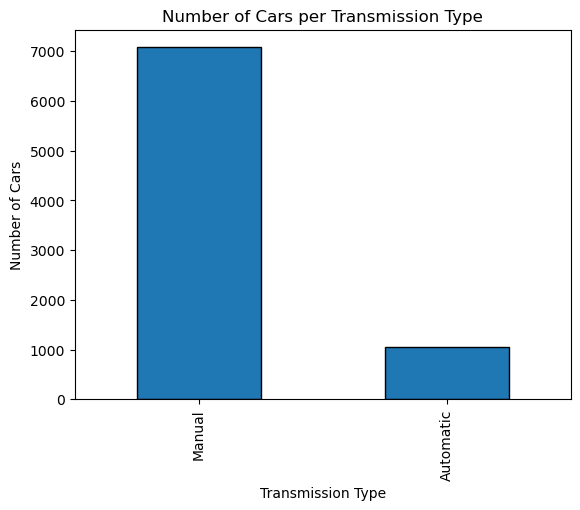

In [126]:
##  Plot a bar chart showing the number of cars per transmission type.
transmission_counts = df['transmission'].value_counts()

transmission_counts.plot(kind='bar',edgecolor ='black')
plt.xlabel("Transmission Type")
plt.ylabel("Number of Cars")
plt.title("Number of Cars per Transmission Type")
plt.show()

In [127]:
##  Find the car with the highest mileage in the dataset.
highest_mileage_row = df.loc[df['mileage'].idxmax()]
car_name = highest_mileage_row['name']
mileage = highest_mileage_row['mileage']
print(f"The car with the highest mileage is {car_name} with a mileage of {mileage} kmpl.")

The car with the highest mileage is Volvo XC90 T8 Excellence BSIV with a mileage of 42.0 kmpl.


In [ ]:
##  Calculate the correlation between mileage and selling price.
correlation = df['mileage'].corr(df['selling_price'])
print(f"Correlation between mileage and selling price: {correlation}")
#it means cars with higher mileage tend to have lower selling prices.

Correlation between mileage and selling price: -0.12545398424289775


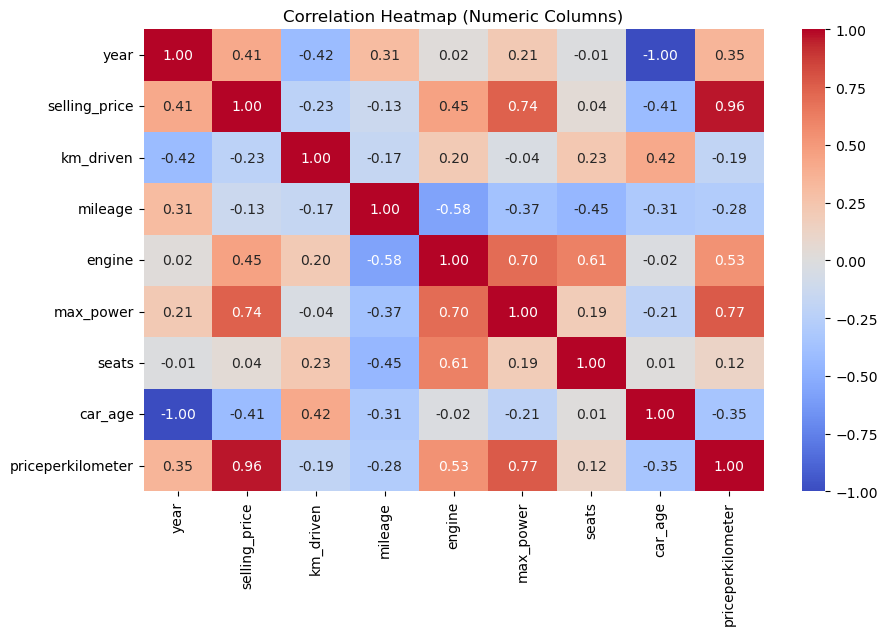

In [53]:
##  Plot a heatmap showing the correlations between all numeric columns.
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()

transmission
Automatic    1.870828e+06
Manual       4.554259e+05
Name: selling_price, dtype: float64


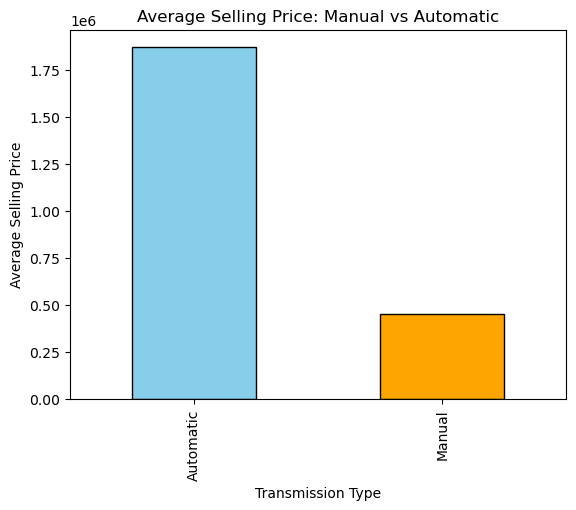

In [128]:
## Check if manual cars are generally cheaper or more expensive than automatic cars.
avg_price_by_transmission = df.groupby('transmission')['selling_price'].mean()

print(avg_price_by_transmission)
avg_price_by_transmission.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')
plt.xlabel("Transmission Type")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price: Manual vs Automatic")
plt.show()

In [129]:
##  Find the average selling price for each year of manufacture.
yearly_avg_price = df.groupby('year')['selling_price'].mean()
print(yearly_avg_price)

year
1983    3.000000e+05
1991    5.500000e+04
1994    8.800000e+04
1995    1.075000e+05
1996    8.166667e+04
1997    9.018173e+04
1998    7.310000e+04
1999    7.583333e+04
2000    9.304155e+04
2001    4.849830e+04
2002    9.899996e+04
2003    9.563669e+04
2004    1.109654e+05
2005    1.411598e+05
2006    1.639044e+05
2007    1.777182e+05
2008    2.074884e+05
2009    2.264349e+05
2010    2.726218e+05
2011    3.237753e+05
2012    3.511643e+05
2013    4.600059e+05
2014    5.161932e+05
2015    5.966133e+05
2016    6.998801e+05
2017    8.892465e+05
2018    9.577695e+05
2019    1.776986e+06
2020    8.852702e+05
Name: selling_price, dtype: float64


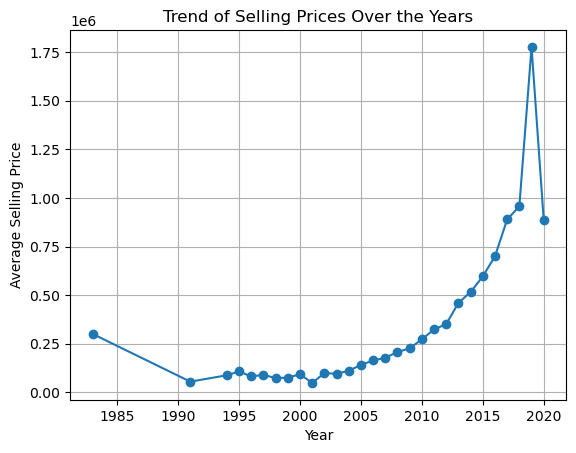

In [56]:
plt.plot(yearly_avg_price.index, yearly_avg_price.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Average Selling Price")
plt.title("Trend of Selling Prices Over the Years")
plt.grid(True)
plt.show()

In [130]:
##  Find the most expensive car for each fuel type.
idx = df.groupby('fuel')['name'].idxmax()
most_expensive_cars = df.loc[idx, ['fuel', 'name', 'selling_price']]
print(most_expensive_cars)

        fuel                            name  selling_price
2758     CNG     Tata Indica V2 Emax CNG GLX         155000
7516  Diesel  Volvo XC60 Inscription D5 BSIV        5500000
90       LPG     Maruti Wagon R LXI LPG BSIV         225000
170   Petrol   Volvo XC90 T8 Excellence BSIV       10000000


In [58]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,priceperkilometer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11,19230.769231
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11,17502.365184
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19,8926.553672
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15,9782.608696
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18,8074.534161


In [59]:
##  Find out which brand appears most frequently in the dataset.
df['brand'] = df['name'].str.split().str[0]
most_common_brand = df['brand'].value_counts().idxmax()
count = df['brand'].value_counts().max()
print(most_common_brand)
print(count)

Maruti
2448


In [62]:
## . Check the top 5 most common combinations of fuel type and transmission.
top_combinations = (
    df.groupby(['fuel', 'transmission'])
    .size()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
    .head(5)
)

print(top_combinations)

     fuel transmission  Count
2  Diesel       Manual   3868
5  Petrol       Manual   3115
1  Diesel    Automatic    534
4  Petrol    Automatic    516
0     CNG       Manual     57


In [ ]:
#31. What are the main assumptions of Linear Regression, and how can you check them using this dataset?


#### Q31 What are the main assumptions of Linear Regression, and how can you check them using this dataset?
 Explain the assumptions (Linearity, Homoscedasticity, Normality of residuals, No multicollinearity, Independence of errors). Then, write code to verify at least three of these assumptions using visualizations or statistics.

 #### Main Assumptions of Linear Regression



#### Linearity

- The relationship between predictors (independent variables) and the target (dependent variable) is linear.

- If the true relationship is curved or more complex, a linear model won’t capture it well.

#### Homoscedasticity

- The variance of the residuals (errors) is constant across all levels of the independent variables.

- If residuals spread more at higher values, this assumption is violated (heteroscedasticity).

#### Normality of Residuals

- Residuals should be approximately normally distributed.

- This is important for valid hypothesis testing and confidence intervals.

#### No Multicollinearity

- Independent variables should not be highly correlated with each other.

- High correlation between predictors makes coefficient estimates unstable.

#### Independence of Errors

- Residuals should not be correlated with each other (especially important for time series data).
 

Any NaNs left? -> 0


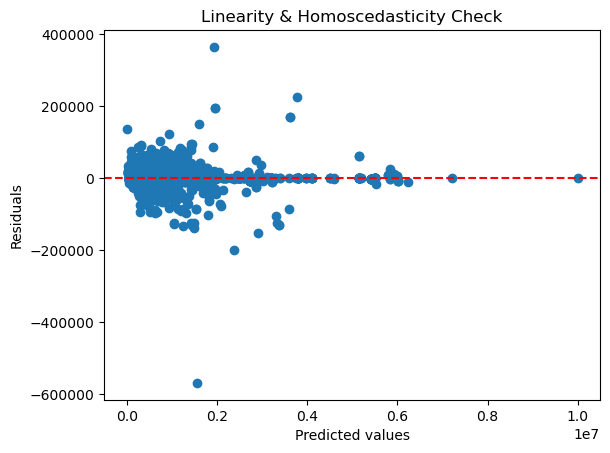

In [66]:
# Assuming 'selling_price' is target variable
X = df.drop(columns=['selling_price'])
y = df['selling_price']

# Convert categorical variables if present
X = pd.get_dummies(X, drop_first=True)
# Handle missing and infinite values
X = X.replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
X = X.fillna(X.mean())  # Fill NaN with column means (or you can drop rows)

# Double-check
print("Any NaNs left? ->", X.isnull().sum().sum())
#print("Any inf left? ->", np.isinf(X.values).sum())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions & residuals
y_pred = model.predict(X_train)
residuals = y_train - y_pred

# 1. Linearity check → scatter plot of predictions vs residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Linearity & Homoscedasticity Check")
plt.show()

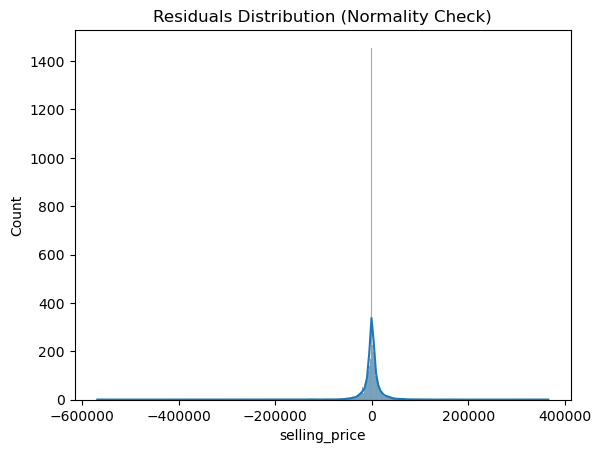

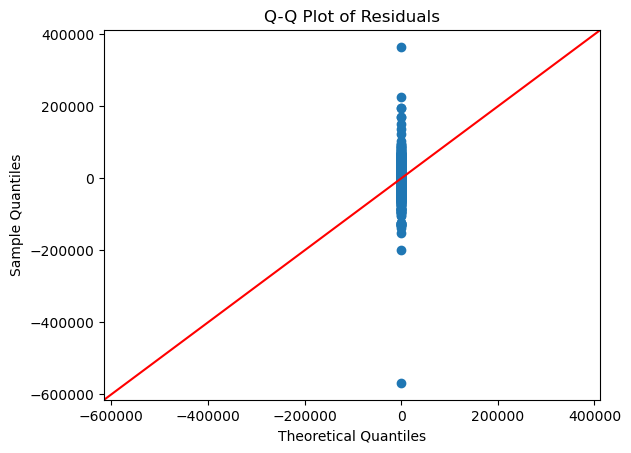

In [69]:
# 2. Normality of residuals
import statsmodels.api as sm

sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution (Normality Check)")
plt.show()

sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [75]:
print(X.dtypes)

year                  int64
km_driven             int64
mileage             float64
engine              float64
max_power           float64
                     ...   
brand_Skoda            bool
brand_Tata             bool
brand_Toyota           bool
brand_Volkswagen       bool
brand_Volvo            bool
Length: 2106, dtype: object


In [76]:
# Convert bool columns to int
X = X.astype({col: int for col in X.select_dtypes(include=['bool']).columns})

# Double-check dtypes
print(X.dtypes)


year                  int64
km_driven             int64
mileage             float64
engine              float64
max_power           float64
                     ...   
brand_Skoda           int32
brand_Tata            int32
brand_Toyota          int32
brand_Volkswagen      int32
brand_Volvo           int32
Length: 2106, dtype: object


In [ ]:
#number 32
# Picking key numeric features + a categorical (brand)
X = df[['year', 'km_driven', 'mileage', 'engine', 'max_power']]
y = df['selling_price']

# ---- Step 2: Train/Test split ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Step 3: Train Linear Regression ----
model = LinearRegression()
model.fit(X_train, y_train)

# ---- Step 4: Print Coefficients & Intercept ----
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)



Intercept: -78769673.34010735
Coefficients: [ 3.86166500e+04 -1.39898853e+00  1.24488879e+04 -7.29269413e+00
  1.64824857e+04]


In [ ]:
#33 Evaluate your linear regression model using R^2 and MSE 
#Also, explain in your own words what each metric tells you about the model’s performance.
y_pred = model.predict(X_test)
r2= r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print("R2 Score:",r2)
print("Mean Squared Error:",mse) 

R2 Score: 0.6521697324043707
Mean Squared Error: 227997328310.72778


In [ ]:
#34. Apply Lasso Regression on the dataset and compare its performance with Linear Regression.
# Explain what Lasso Regression does differently and why it can be useful when you have many features.
# Select features and target
X = df[['year', 'km_driven', 'mileage', 'engine', 'max_power']]
y = df['selling_price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# Lasso Regression (alpha controls regularization strength)
lasso_model = Lasso(alpha=1000)  # you can tune alpha
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate both models
metrics = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso Regression"],
    "R² Score": [r2_score(y_test, y_pred_lin), r2_score(y_test, y_pred_lasso)],
    "MSE": [mean_squared_error(y_test, y_pred_lin), mean_squared_error(y_test, y_pred_lasso)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_lin)), 
             np.sqrt(mean_squared_error(y_test, y_pred_lasso))]
})

print(metrics)

# Print coefficients
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear Coefficients": lin_model.coef_,
    "Lasso Coefficients": lasso_model.coef_
})
print(coef_df)

               Model  R² Score           MSE           RMSE
0  Linear Regression  0.652170  2.279973e+11  477490.657826
1   Lasso Regression  0.652147  2.280124e+11  477506.416063
     Feature  Linear Coefficients  Lasso Coefficients
0       year         38616.650018        38569.329795
1  km_driven            -1.398989           -1.400663
2    mileage         12448.887945        12375.717470
3     engine            -7.292694           -7.581975
4  max_power         16482.485688        16482.574186


In [ ]:
#35.Apply Ridge Regression on the dataset and compare its performance with both Linear and Lasso Regression.
# Discuss why Ridge might perform better or worse in certain cases.
# Select features and target
X = df[['year', 'km_driven', 'mileage', 'engine', 'max_power']]
y = df['selling_price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=1000)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Ridge Regression
ridge_model = Ridge(alpha=1000)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate models
metrics = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso Regression", "Ridge Regression"],
    "R² Score": [
        r2_score(y_test, y_pred_lin),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_ridge)
    ],
    "MSE": [
        mean_squared_error(y_test, y_pred_lin),
        mean_squared_error(y_test, y_pred_lasso),
        mean_squared_error(y_test, y_pred_ridge)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lin)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge))
    ]
})

print(metrics)

# Coefficients comparison
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear Coefficients": lin_model.coef_,
    "Lasso Coefficients": lasso_model.coef_,
    "Ridge Coefficients": ridge_model.coef_
})
print(coef_df)

               Model  R² Score           MSE           RMSE
0  Linear Regression  0.652170  2.279973e+11  477490.657826
1   Lasso Regression  0.652147  2.280124e+11  477506.416063
2   Ridge Regression  0.652110  2.280366e+11  477531.792247
     Feature  Linear Coefficients  Lasso Coefficients  Ridge Coefficients
0       year         38616.650018        38569.329795        38166.304084
1  km_driven            -1.398989           -1.400663           -1.411123
2    mileage         12448.887945        12375.717470        12471.377780
3     engine            -7.292694           -7.581975           -7.303771
4  max_power         16482.485688        16482.574186        16492.209243


In [ ]:
#36.Use cross-validation to evaluate your Ridge Regression model.
 #Explain why cross-validation gives a better estimate of model performance than a single train-test split.
from sklearn.model_selection import cross_val_score
# Ridge Regression model
ridge_cv = Ridge(alpha=1000)

# Perform 5-fold cross-validation using R² score
r2_scores = cross_val_score(ridge_cv, X, y, cv=5, scoring="r2")

# Perform 5-fold cross-validation using negative MSE
mse_scores = cross_val_score(ridge_cv, X, y, cv=5, scoring="neg_mean_squared_error")

# Convert MSE scores from negative to positive
mse_scores = -mse_scores

print("Cross-Validated R² Scores:", r2_scores)
print("Average R² Score:", np.mean(r2_scores))
print("Cross-Validated MSE Scores:", mse_scores)
print("Average MSE:", np.mean(mse_scores))
print("Average RMSE:", np.sqrt(np.mean(mse_scores)))

Cross-Validated R² Scores: [0.66798767 0.61876211 0.64325876 0.57614499 0.6230926 ]
Average R² Score: 0.6258492248644163
Cross-Validated MSE Scores: [2.59230701e+11 2.16086428e+11 2.68478392e+11 2.23507632e+11
 2.31782965e+11]
Average MSE: 239817223672.08
Average RMSE: 489711.3677178425


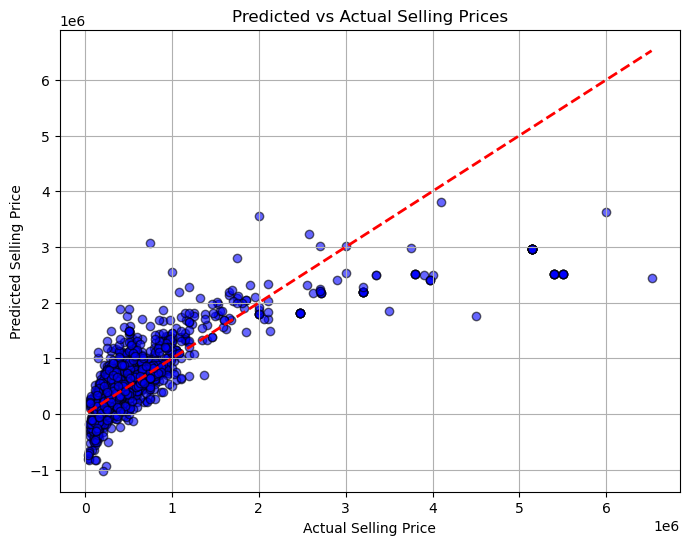

In [ ]:
#37.Plot the predicted vs actual prices for your best-performing model.
#Discuss what the plot reveals about the accuracy of your predictions.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = Ridge(alpha=1000)
best_model.fit(X_train, y_train)

# Predictions
y_pred = best_model.predict(X_test)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", edgecolors="k")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--", linewidth=2)

plt.title("Predicted vs Actual Selling Prices")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.grid(True)
plt.show()

In [151]:
#38. Use GridSearchCV to find the best alpha value for Ridge Regression.
#Explain what alpha does in Ridge/Lasso regression and why tuning it is important.
from sklearn.model_selection import GridSearchCV, train_test_split

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define Ridge model
ridge = Ridge()

# Grid of alpha values to try
param_grid = {
    "alpha": np.logspace(-3, 3, 20)  # from 0.001 to 1000
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring="r2",
    cv=5,
    n_jobs=-1
)

# Fit search
grid_search.fit(X_train, y_train)

# Results
print("Best alpha:", grid_search.best_params_["alpha"])
print("Best R² score (CV):", grid_search.best_score_)

# Evaluate on test set
best_ridge = grid_search.best_estimator_
test_r2 = best_ridge.score(X_test, y_test)
print("Test R² score:", test_r2)

Best alpha: 0.001
Best R² score (CV): 0.6223072755025474
Test R² score: 0.6521697323477742


In [ ]:
#39. Try Polynomial Regression on the dataset.
 #Compare the results with Linear Regression and explain when polynomial regression might be useful.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1 Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Metrics for Linear Regression
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)

print("Linear Regression:")
print("  R²:", r2_lin)
print("  MSE:", mse_lin)

# 2 Polynomial Regression (degree=2)
poly_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression())
])
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

# Metrics for Polynomial Regression
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)

print("\nPolynomial Regression (degree=2):")
print("  R²:", r2_poly)
print("  MSE:", mse_poly)

# Compare
if r2_poly > r2_lin:
    print("\n Polynomial Regression performed better.")
else:
    print("\n Linear Regression performed better.")

Linear Regression:
  R²: 0.6521697324043707
  MSE: 227997328310.72778

Polynomial Regression (degree=2):
  R²: 0.8636251399948547
  MSE: 89391598795.73792

 Polynomial Regression performed better.


In [154]:
#40. Summarize your findings:
#Which model performed best (Linear, Lasso, Ridge, or Polynomial)?
#Explain why you think it performed better and what you would do next to improve predictions.